In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline

In [103]:
plotpar = {'axes.labelsize': 40,
           'font.size': 25,
           'legend.fontsize': 25,
           'xtick.labelsize': 25,
           'ytick.labelsize': 25,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [22]:
def get_ages_periods(min_bv, max_bv, clusters, flag):
    h = clusters.flag.values == flag
    m = select(min_bv, max_bv, clusters.b_v.values[h])
    h_age = np.median(clusters.age.values[h][m])
    h_period = np.median(clusters.period.values[h][m])
    return h_age, h_period

In [23]:
def select(min_bv, max_bv, bvs):
    return (min_bv < bvs) * (bvs < max_bv)

In [29]:
def cluster_data(min_bv=.6, max_bv=.7):
    clusters = pd.read_csv("data/clusters.csv");

    # load NGC6819
    bv19s, p19s = np.genfromtxt("data/NGC6819.txt", skip_header=1).T
    a19s = np.ones_like(p19s)*2.5

    # select based on colour

    m = select(min_bv, max_bv, bv19s)
    n19_age = np.median(a19s[m])
    n19_period = np.median(p19s[m])
     
    h_age, h_period = get_ages_periods(min_bv, max_bv, clusters, 4)
    p_age, p_period = get_ages_periods(min_bv, max_bv, clusters, 5)
    n_age, n_period = get_ages_periods(min_bv, max_bv, clusters, 6)
    c_age, c_period = get_ages_periods(min_bv, max_bv, clusters, 7)
    return h_age, h_period, p_age, p_period, n_age, n_period, c_age, c_period, n19_age, n19_period

In [30]:
def log_period_model(par, log_a, bv):
    a, b, c, n = par
    return np.log10(a) + n * log_a + b * np.log10(bv - c)
pars = [.4, .31, .45, .55]  # Angus

In [34]:
h_age, h_period, p_age, p_period, n_age, n_period, c_age, c_period, n19_age, n19_period = cluster_data()

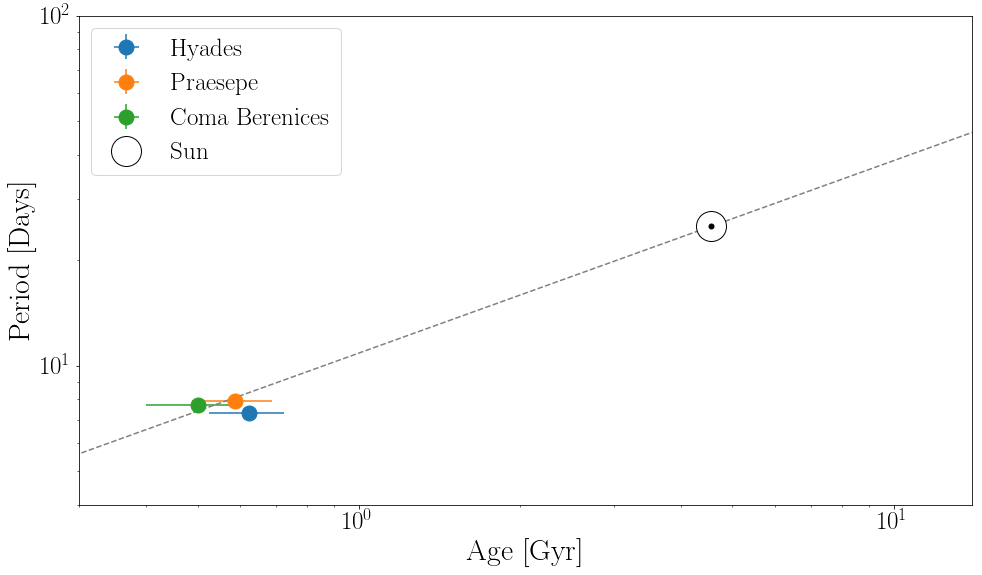

In [67]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.errorbar(h_age, h_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Hyades}$")
ax.errorbar(p_age, p_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Praesepe}$")
ax.errorbar(c_age, c_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Coma~Berenices}$")
ax.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="wo", ms=30, mec="k", label="$\mathrm{Sun}$")
ax.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="k.", ms=10, label="$\mathrm{Sun}$")

xs = np.linspace(.1, 20, 100)
ax.plot(xs, 10**log_period_model(pars, np.log10(xs*1000), .65), '.5', ls="--")
# extraticks = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# ax.yticks(list(plt.xticks()[0]) + extraticks)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_yticks([10, 20])
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().get_major_formatter().labelOnlyBase = False
ax.legend()
ax.set_xlim(.3, 14)
ax.set_ylim(4, 100)
ax.set_xlabel("$\mathrm{Age~[Gyr]}$")
ax.set_ylabel("$\mathrm{Period~[Days]}$")
plt.savefig("young_clusters")

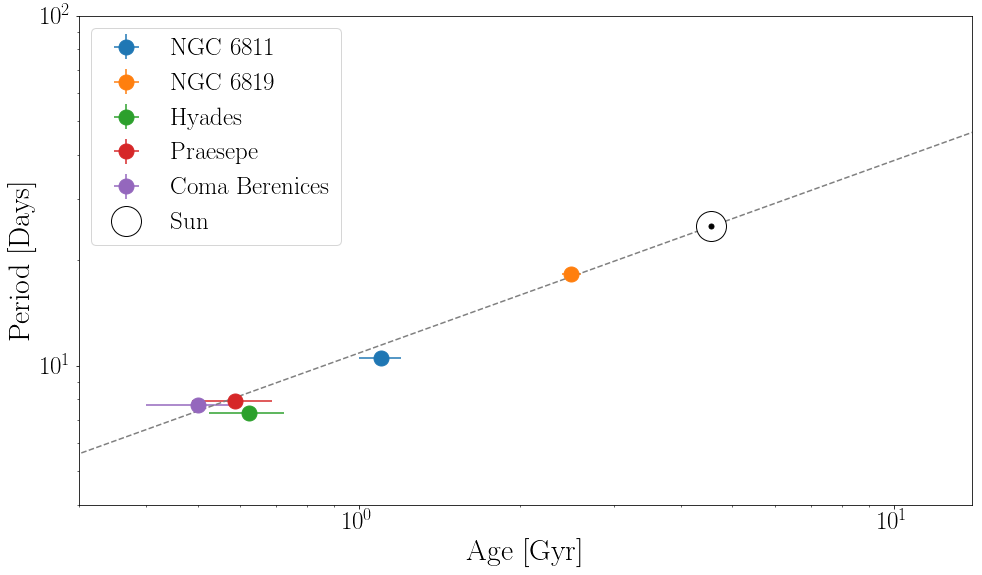

In [61]:
plt.figure(figsize=(16, 9))
plt.errorbar(n_age, n_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6811}$")
plt.errorbar(n19_age, n19_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6819}$")
plt.errorbar(h_age, h_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Hyades}$")
plt.errorbar(p_age, p_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Praesepe}$")
plt.errorbar(c_age, c_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Coma~Berenices}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="wo", ms=30, mec="k", label="$\mathrm{Sun}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="k.", ms=10, label="$\mathrm{Sun}$")

xs = np.linspace(.1, 20, 100)
plt.plot(xs, 10**log_period_model(pars, np.log10(xs*1000), .65), '.5', ls="--")
plt.loglog()
plt.legend()
plt.xlim(.3, 14)
plt.ylim(4, 100)
plt.xlabel("$\mathrm{Age~[Gyr]}$")
plt.ylabel("$\mathrm{Period~[Days]}$")
plt.savefig("old_clusters")

Load asteroseismic stars.

In [62]:
# Add the Kepler stars.
data = np.genfromtxt("data/garcia_irfm.txt")
t, t_err, a, a_errp, a_errm = data[1], data[2], data[3], data[4], data[5]
p, p_err, logg, logg_errp, logg_errm = data[6], data[7], data[8], data[9], data[10]
feh, feh_err, flag = data[11], data[12], data[13]
a_err = .5 * (a_errp + a_errm)

df = pd.DataFrame(dict({
            "age": a, "age_errp": a_errp, "age_errm": a_errm, 
            "period": p, "period_err": p_err,
            "teff": t, "teff_err": t_err,
            "logg": logg, "logg_errp": logg_errp, "logg_errm": logg_errm,
            "feh": feh, "feh_err": feh_err, 
            "flag": flag
        }))

df.to_csv("data/astero_targets.csv")

In [63]:
astero = pd.read_csv("data/astero_targets.csv")

Remove subgiants and select Solar types.

In [64]:
subgiant = 4.2
m = (astero.logg.values > subgiant) & (5300 < astero.teff.values) & (astero.teff.values < 6000)
astero = astero.iloc[m]

Calculate medians.

In [40]:
astero_age = np.median(astero.age.values)
astero_age_err = (np.median(astero.age.values**2))**.5
astero_period = np.median(astero.period.values)
astero_period_err = (np.median(astero.period.values**2))**.5

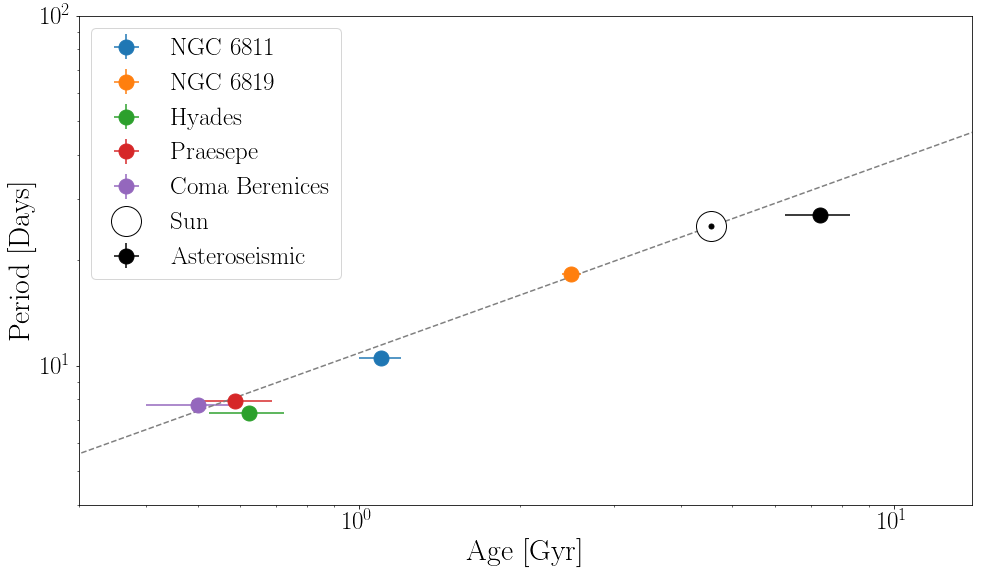

In [66]:
plt.figure(figsize=(16, 9))
plt.errorbar(n_age, n_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6811}$")
plt.errorbar(n19_age, n19_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6819}$")
plt.errorbar(h_age, h_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Hyades}$")
plt.errorbar(p_age, p_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Praesepe}$")
plt.errorbar(c_age, c_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Coma~Berenices}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="wo", ms=30, mec="k", label="$\mathrm{Sun}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="k.", ms=10, label="$\mathrm{Sun}$")
plt.errorbar(astero_age, astero_period, xerr=astero_age_err/astero_age, 
             yerr=astero_period_err/astero_period_err, fmt="k.", ms=30, 
             label="$\mathrm{Asteroseismic}$")

xs = np.linspace(.1, 20, 100)
plt.plot(xs, 10**log_period_model(pars, np.log10(xs*1000), .65), '.5', ls="--")
plt.loglog()
plt.legend()
plt.xlim(.3, 14)
plt.ylim(4, 100)
plt.xlabel("$\mathrm{Age~[Gyr]}$")
plt.ylabel("$\mathrm{Period~[Days]}$")
plt.savefig("add_astero")

Now with a broken power law:

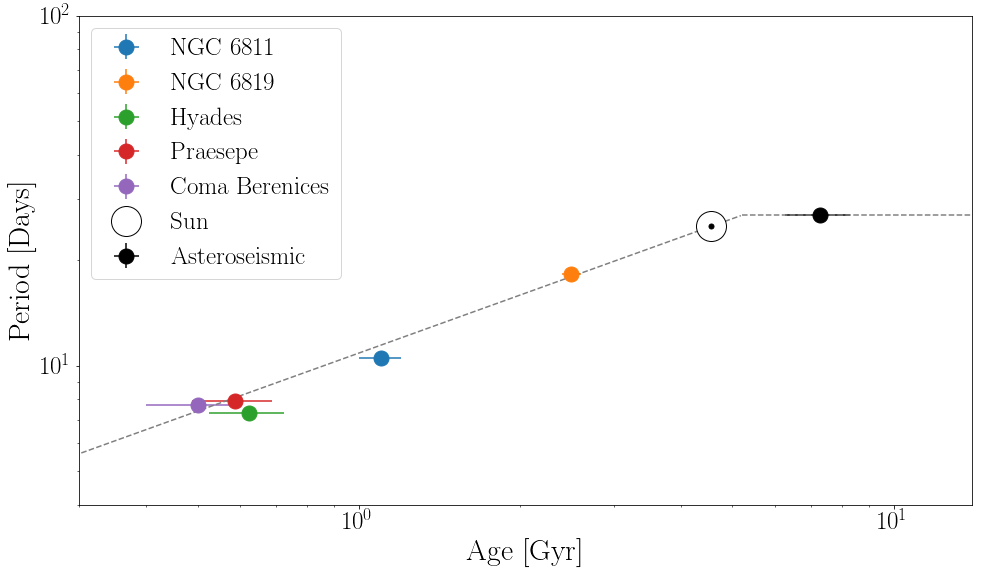

In [59]:
plt.figure(figsize=(16, 9))
plt.errorbar(n_age, n_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6811}$")
plt.errorbar(n19_age, n19_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6819}$")
plt.errorbar(h_age, h_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Hyades}$")
plt.errorbar(p_age, p_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Praesepe}$")
plt.errorbar(c_age, c_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Coma~Berenices}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="wo", ms=30, mec="k", label="$\mathrm{Sun}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="k.", ms=10, label="$\mathrm{Sun}$")
plt.errorbar(astero_age, astero_period, xerr=astero_age_err/astero_age, 
             yerr=astero_period_err/astero_period_err, fmt="k.", ms=30, 
             label="$\mathrm{Asteroseismic}$")

xs = np.linspace(.1, 20, 600)
m = xs < 5.2
plt.plot(xs[m], 10**log_period_model(pars, np.log10(xs*1000), .65)[m], '.5', ls="--")
plt.plot(xs[~m], np.zeros(len(xs[~m])) + 27, '.5', ls="--")
plt.loglog()
plt.legend()
plt.xlim(.3, 14)
plt.ylim(4, 100)
plt.xlabel("$\mathrm{Age~[Gyr]}$")
plt.ylabel("$\mathrm{Period~[Days]}$")
plt.savefig("add_astero_mod_model")

Now add subgiant evolution.

Now with van Saders model.

In [69]:
vs = pd.read_csv("skeleton3_run_000.out", skiprows=172)
m = vs.Mass_Msun.values == 1
vs_sun = vs.iloc[m]

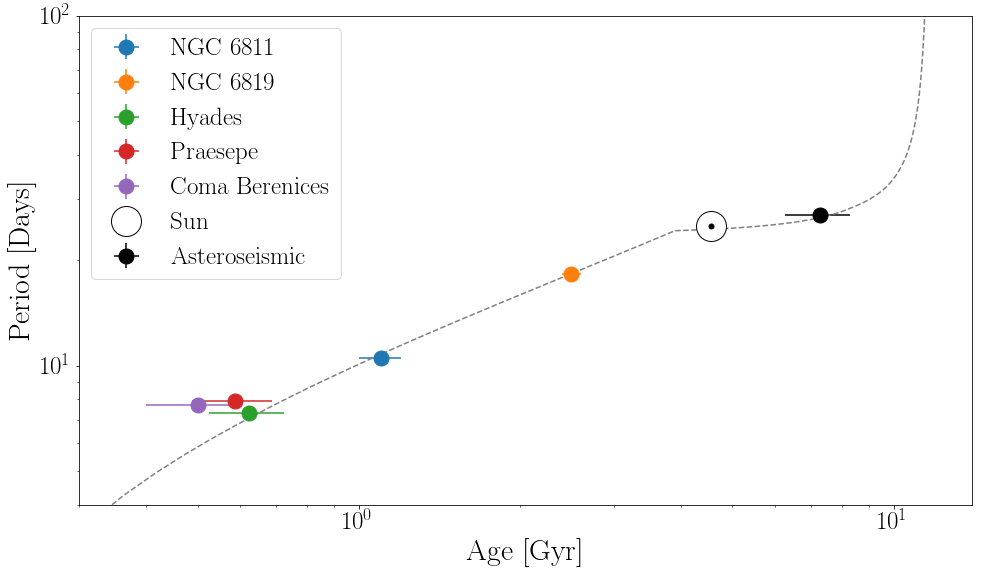

In [71]:
plt.figure(figsize=(16, 9))
plt.errorbar(n_age, n_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6811}$")
plt.errorbar(n19_age, n19_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6819}$")
plt.errorbar(h_age, h_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Hyades}$")
plt.errorbar(p_age, p_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Praesepe}$")
plt.errorbar(c_age, c_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Coma~Berenices}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="wo", ms=30, mec="k", label="$\mathrm{Sun}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="k.", ms=10, label="$\mathrm{Sun}$")
plt.errorbar(astero_age, astero_period, xerr=astero_age_err/astero_age, 
             yerr=astero_period_err/astero_period_err, fmt="k.", ms=30, 
             label="$\mathrm{Asteroseismic}$")
plt.plot(vs_sun.Age_Gyr.values, vs_sun.Prot_days.values-2, '.5', ls="--")

xs = np.linspace(.1, 20, 100)
plt.loglog()
plt.legend()
plt.xlim(.3, 14)
plt.ylim(4, 100)
plt.xlabel("$\mathrm{Age~[Gyr]}$")
plt.ylabel("$\mathrm{Period~[Days]}$")
plt.savefig("add_astero_vs")

Now do lower and higher mass versions.

In [123]:
h_age, h_period, p_age, p_period, n_age, n_period, c_age, c_period = cluster_data(.5, .6)  # more massive
astero = pd.read_csv("data/astero_targets.csv")
subgiant = 4.2
m = (astero.logg.values > subgiant) & (6000 < astero.teff.values) & (astero.teff.values < 6250)
astero = astero.iloc[m]
astero_age = np.median(astero.age.values)
astero_age_err = (np.median(astero.age.values**2))**.5
astero_period = np.median(astero.period.values)
astero_period_err = (np.median(astero.period.values**2))**.5

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


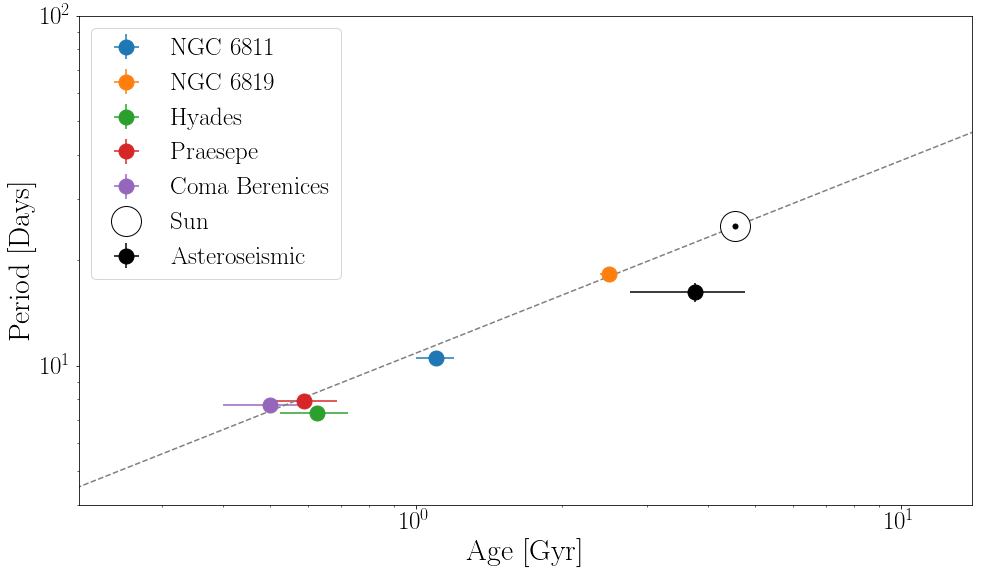

In [124]:
plt.figure(figsize=(16, 9))
plt.errorbar(n_age, n_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6811}$")
plt.errorbar(n19_age, n19_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6819}$")
plt.errorbar(h_age, h_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Hyades}$")
plt.errorbar(p_age, p_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Praesepe}$")
plt.errorbar(c_age, c_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Coma~Berenices}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="wo", ms=30, mec="k", label="$\mathrm{Sun}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="k.", ms=10, label="$\mathrm{Sun}$")
plt.errorbar(astero_age, astero_period, xerr=astero_age_err/astero_age, 
             yerr=astero_period_err/astero_period_err, fmt="k.", ms=30, 
             label="$\mathrm{Asteroseismic}$")

xs = np.linspace(0, 20, 100)
plt.plot(xs, 10**log_period_model(pars, np.log10(xs*1000), .65), '.5', ls="--")
plt.loglog()
plt.legend()
plt.xlim(0, 14)
plt.ylim(4, 100)
plt.xlabel("$\mathrm{Age~[Gyr]}$")
plt.ylabel("$\mathrm{Period~[Days]}$")
plt.savefig("add_astero_high_mass")

In [121]:
h_age, h_period, p_age, p_period, n_age, n_period, c_age, c_period = cluster_data(.7, .8)  # less massive
astero = pd.read_csv("data/astero_targets.csv")
subgiant = 4.2
m = (astero.logg.values > subgiant) & (astero.teff.values < 5300)
astero = astero.iloc[m]
astero_age = np.median(astero.age.values)
astero_age_err = (np.median(astero.age.values**2))**.5
astero_period = np.median(astero.period.values)
astero_period_err = (np.median(astero.period.values**2))**.5

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10
/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


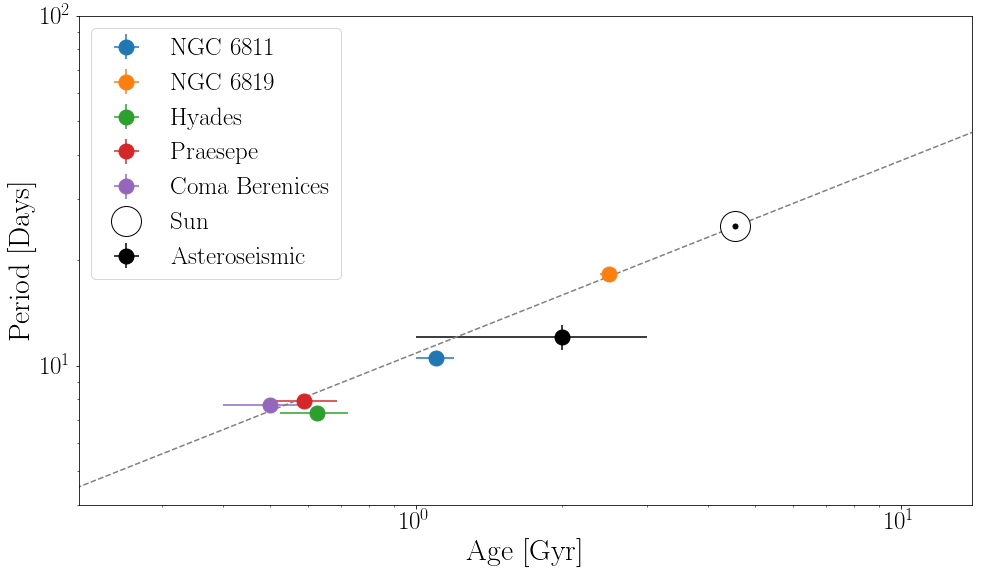

In [122]:
plt.figure(figsize=(16, 9))
plt.errorbar(n_age, n_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6811}$")
plt.errorbar(n19_age, n19_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{NGC~6819}$")
plt.errorbar(h_age, h_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Hyades}$")
plt.errorbar(p_age, p_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Praesepe}$")
plt.errorbar(c_age, c_period, xerr=.1, yerr=.1, fmt=".", ms=30, label="$\mathrm{Coma~Berenices}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="wo", ms=30, mec="k", label="$\mathrm{Sun}$")
plt.errorbar(4.56, 25, xerr=1e-3, yerr=1e-3, fmt="k.", ms=10, label="$\mathrm{Sun}$")
plt.errorbar(astero_age, astero_period, xerr=astero_age_err/astero_age, 
             yerr=astero_period_err/astero_period_err, fmt="k.", ms=30, 
             label="$\mathrm{Asteroseismic}$")

xs = np.linspace(0, 20, 100)
plt.plot(xs, 10**log_period_model(pars, np.log10(xs*1000), .65), '.5', ls="--")
plt.loglog()
plt.legend()
plt.xlim(0, 14)
plt.ylim(4, 100)
plt.xlabel("$\mathrm{Age~[Gyr]}$")
plt.ylabel("$\mathrm{Period~[Days]}$")
plt.savefig("add_astero_high_mass")

In [137]:
vs_sun.keys()

Index(['J', 'K', 'Age_Gyr', 'L_Lsun', 'R_Rsun', 'log_Teff_K', 'Mcz_Msun',
       'Rcz_Rsun', 'Xcen', 'Itot_cgs', 'Icz_cgs', 'Tau_cz_sec', 'He_core_Msun',
       'Patm_cgs', 'Mass_Msun', 'Prot_days', 'Icore_cgs', 'Omega_core',
       'Omega_env', 'Jtot_cgs', 'Jcore_cgs', 'Jenv_cgs'],
      dtype='object')

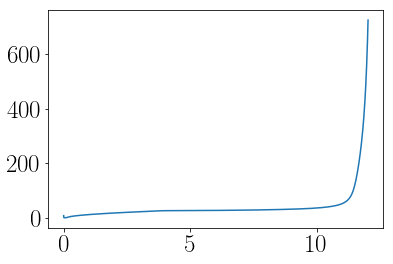

In [140]:
plt.plot(vs_sun.Age_Gyr, vs_sun.Prot_days)

In [133]:
print(va_ages)

[1.3604042599999999, 2.3768072400000002, 3.20483633, 4.0656921800000001, 6.69211519]


In [90]:
clusters = pd.read_csv("data/clusters.csv");

In [159]:
m = clusters.flag.values == 5
age = clusters.age.values[m]
period = clusters.period.values[m]
b_v = clusters.b_v.values[m]

#b_v, period = np.genfromtxt("data/NGC6819.txt", skip_header=1).T
#age = np.ones_like(period)*2.5

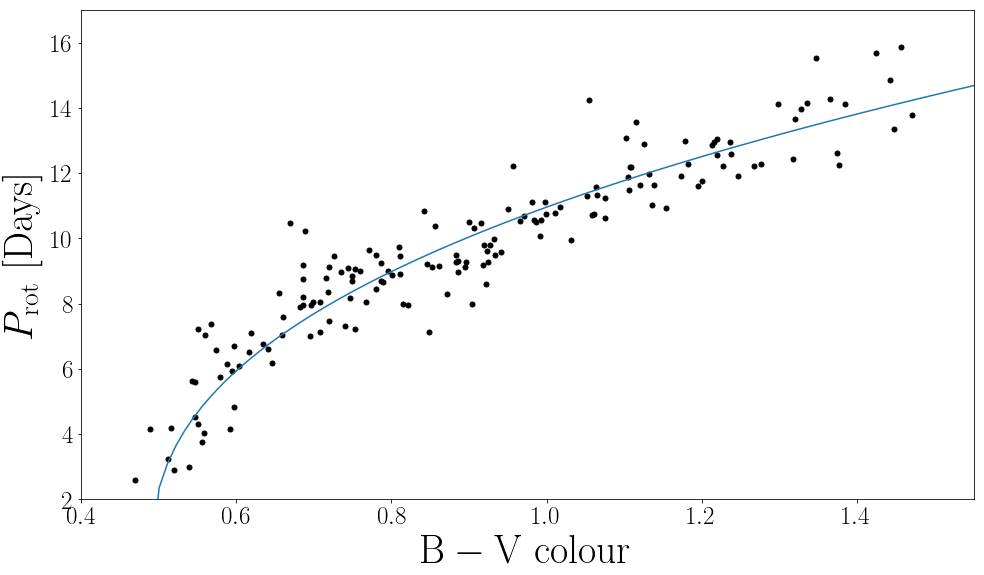

In [160]:
pars = [.4, .31, .45, .55]  # Angus
a, b, c, n = .43, 0.4, 0.49, 0.55
bvs = np.linspace(c, max(b_v)+.1, 100)
ps = (age[0]*1e3)**n * a * (bvs - c)**b
plt.figure(figsize=(16, 9))
plt.plot(b_v, period, "k.", ms=10)
plt.plot(bvs, ps)
plt.ylim(2, 17)
plt.xlim(.4, 1.55)
plt.xlabel("$\mathrm{B-V~colour}$")
plt.ylabel("$P_{\mathrm{rot}}\mathrm{~[Days]}$")
plt.savefig("pleaides")

In [163]:
df = pd.read_csv("data/hyades_douglas.tsv", skiprows=76)
mass, period, age = df.Mass.values, df.IPer.values, 500

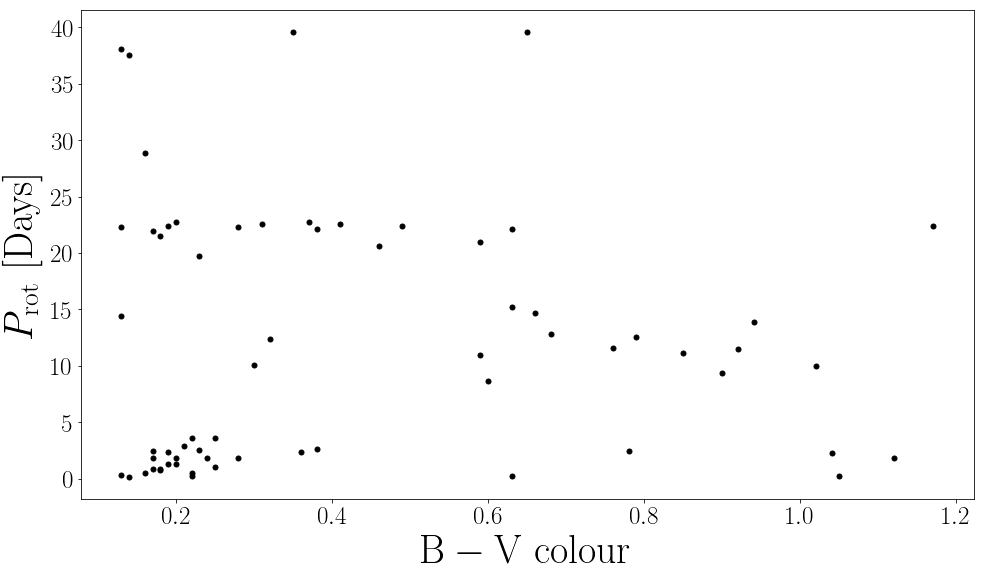

In [168]:
pars = [.4, .31, .45, .55]  # Angus
#a, b, c, n = .43, 0.4, 0.49, 0.55
a, b, c, n = pars
bvs = np.linspace(c, max(b_v)+.1, 100)
ps = (age*1e3)**n * a * (bvs - c)**b
plt.figure(figsize=(16, 9))
plt.plot(mass, period, "k.", ms=10)
#plt.plot(bvs, ps)
#plt.ylim(2, 17)
#plt.xlim(.4, 1.55)
plt.xlabel("$\mathrm{B-V~colour}$")
plt.ylabel("$P_{\mathrm{rot}}\mathrm{~[Days]}$")
plt.savefig("pleaides")